# Pymaceuticals Inc.
---

### Analysis

The first observation for the Pymaceuticals Inc. mouse study regarding different drug regimens in the treatment of squamous cell carcinoma (SCC) is that the number of mice tested per drug are not equal. Looking at the Mice per Drug Regimen bar charts it is clear that Capomulin and Ramicane have over two hundred mice whereas every other drug has under two hundred. If an equal number of mice were used per drug, it could lead to better data analysis through a better comparison between drugs, albeit less helpful bar charts. 

This leads to the second observation, which is that Capomulin and Ramicane have substantially lower Final Tumor Volumes compared to Infubinol and Ceftamin. Capomulin and Ramicane both have Average Final Tumor Volumes under forty, while Infubinol and Ceftamin have Average Final Tumor Volumes closer to sixty. This may indicate that Capomulin and Ramicane are better drug regimens for treating SCC in mice. However, referring back to the first observation, the population sizes for Capomulin and Ramicane are larger. Since the mice per drug are unequal, it is important to call out how the number of mice could impact the summary statistics. Meaning, there could be a chance that Capomulin and Ramicane have lower averages because a larger population was used and if Infubinol and Ceftamin were tested with the same population number, there could possibly be a reduction in the Average Final Tumor Volumes. However, the only way to confirm this would be through further testing which may be unrealistic due to budgeting, drug availability, etc. But if given the chance to start the testing over, one recommendation would be to equally spread the number of mice per drug to eliminate any unknowns due to controllable factors. 

The last and third observation is that there is a strong linear correlation between the mouse weight and average tumor volume for Capomulin. The scatter plot depicting the linear regression of the Capomulin treatment, shows a strong positive correlation between Average Tumor Volume and Mouse Weight. This means that an increase in mouse weight relates to an increase in average tumor size. Or put differently, the larger the mouse, the larger the tumor. This can be considered a strong positive correlation because the r value or correlation coefficient is 0.84. The direction of the red line, going up from left to right, also shows a positive correlation, however the r value does it in clearer terms. Since 0.84 is positive and greater than 0.7, based on the Pearson Coefficient boundaries of -1 to 1, it can be determined that a linear model accurately represents the correlation between mouse weight and average tumor volume for the Capomulin treatment. 

 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
# The files have two different lengths for Mouse ID, so merged using a left join with the longer dataset in case some of the data doesn't match 
# Also tried other merges to see how the data was changed/affected. Left best resembled the DataFrame in the starter code 
mouse_df = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="left")

# Display the data table for preview
mouse_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
# Have to use len because the Mouse IDs appear multiple times at different time points 
mouse_count = len(mouse_df["Mouse ID"].unique())
mouse_count

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_duplicate_tp = mouse_df[mouse_df.duplicated(subset=['Mouse ID','Timepoint'], keep=False)]
mouse_duplicate_tp = mouse_duplicate_tp['Mouse ID'].values[0:1]
mouse_duplicate_tp

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_duplicate = mouse_df.loc[mouse_df['Mouse ID']=='g989']
mouse_duplicate

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID. 
# Dropped mouse g989 from the entire data set 
mouse_df_new = mouse_df[mouse_df["Mouse ID"] !='g989']
mouse_df_new.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
mouse_count_new = len(mouse_df_new["Mouse ID"].unique())
mouse_count_new

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Without numeric_only = True, a warning is given because not all the columns in mouse_df_new are numbers
tumor_mean = mouse_df_new.groupby(["Drug Regimen"]).mean(numeric_only=True)["Tumor Volume (mm3)"]
tumor_median = mouse_df_new.groupby(["Drug Regimen"]).median(numeric_only=True)["Tumor Volume (mm3)"]
tumor_variance = mouse_df_new.groupby(["Drug Regimen"]).var(numeric_only=True)["Tumor Volume (mm3)"]
tumor_std = mouse_df_new.groupby(["Drug Regimen"]).std(numeric_only=True)["Tumor Volume (mm3)"]
tumor_sem = mouse_df_new.groupby(["Drug Regimen"]).sem(numeric_only=True)["Tumor Volume (mm3)"]

# Assemble the resulting series into a single summary DataFrame.
# Created a single summary DataFrame by using merge and renaming the columns 
sum_stat1 = pd.merge(tumor_mean, tumor_median, on="Drug Regimen")
sum_stat1 = sum_stat1.rename(columns={"Tumor Volume (mm3)_x":"Mean Tumor Volume","Tumor Volume (mm3)_y":"Median Tumor Volume"})
sum_stat2 = pd.merge(sum_stat1, tumor_variance, on="Drug Regimen")
sum_stat2 = sum_stat2.rename(columns={"Tumor Volume (mm3)":"Tumor Volume Variance"})
sum_stat3 = pd.merge(sum_stat2, tumor_std, on="Drug Regimen")
sum_stat3 = sum_stat3.rename(columns={"Tumor Volume (mm3)":"Tumor Volume Std. Dev."})
summary_df = pd.merge(sum_stat3, tumor_sem, on="Drug Regimen")
summary_df = summary_df.rename(columns={"Tumor Volume (mm3)": "Tumor Volume Std. Err"})
summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line.
mouse_df_new.groupby(['Drug Regimen']).agg({"Tumor Volume (mm3)": ['mean','median','var','std','sem']})

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

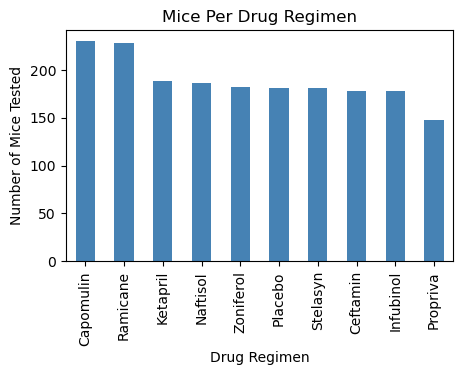

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
# Looked up pandas' plot colors to try and color match to the example. Steel blue seemed like the best match 
# Had to also sort the DataFrame because without the Number of Mice descending and the Drug Regimen ascending, the order was different from the starter code 
pandas_drugs = pd.DataFrame(mouse_df_new["Drug Regimen"].value_counts())
pandas_drugs = pandas_drugs.rename(columns={"Drug Regimen":"Number of Mice"})
pandas_drugs = pandas_drugs.rename_axis("Drug Regimen")
pandas_drugs = pandas_drugs.sort_values(by=['Number of Mice', 'Drug Regimen'], ascending=[False, True])
pandas_bar = pandas_drugs.plot(kind="bar", color="steelblue", title="Mice Per Drug Regimen", ylabel="Number of Mice Tested", xlabel="Drug Regimen",figsize=(5,3), legend=False)


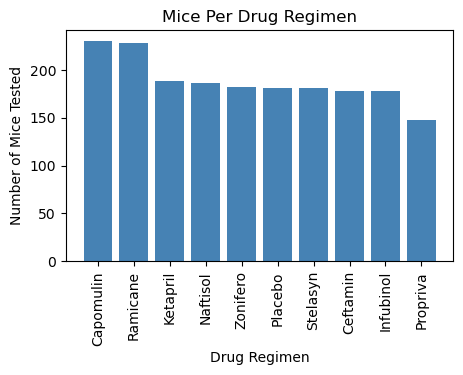

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x_axis = np.arange(len(pandas_drugs))
num_mice = pandas_drugs["Number of Mice"]
plt.figure(figsize=(5,3))
plt.bar(x_axis, num_mice, color="steelblue", align="center")
tick_locations = list(x_axis)
plt.xticks(tick_locations, ["Capomulin", "Ramicane", "Ketapril", "Naftisol", "Zonifero", "Placebo", "Stelasyn", "Ceftamin", "Infubinol", "Propriva"] ,rotation=90)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.title("Mice Per Drug Regimen")
plt.show()


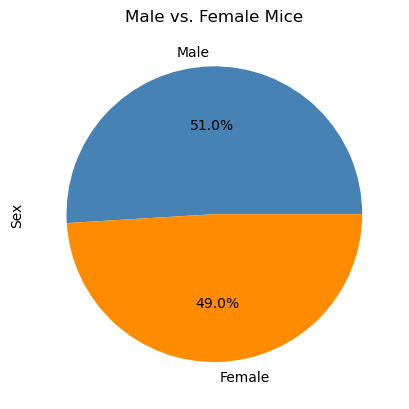

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
pandas_fm = mouse_df_new["Sex"].value_counts()
pandas_pie = pandas_fm.plot(kind="pie", colors=["steelblue", "darkorange"], autopct="%.1f%%", title="Male vs. Female Mice")

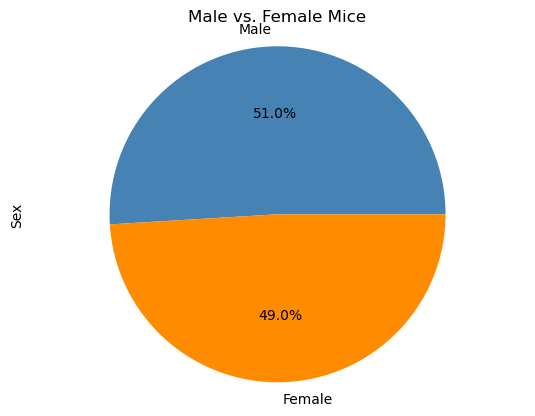

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(pandas_fm, labels=["Male","Female"], colors=["steelblue", "darkorange"], autopct="%.1f%%")
plt.axis("equal")
plt.title("Male vs. Female Mice")
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_tp = pd.DataFrame(mouse_df_new.groupby(["Mouse ID"]).max(numeric_only=True)["Timepoint"])
max_tp = max_tp.reset_index()
max_tp = max_tp.rename(columns={"Timepoint":"Last Timepoint"})

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
mouse_df_latest = pd.merge(max_tp, mouse_df, on="Mouse ID", how="left")
mouse_latest = mouse_df_latest[mouse_df_latest["Timepoint"] == mouse_df_latest["Last Timepoint"]]
mouse_latest.head()

,Mouse ID,Last Timepoint,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
9,a203,45,45,67.973419,2,Infubinol,Female,20,23
19,a251,45,45,65.525743,1,Infubinol,Female,21,25
29,a262,45,45,70.717621,4,Placebo,Female,17,29
39,a275,45,45,62.999356,3,Ceftamin,Female,20,28
46,a366,30,30,63.440686,1,Stelasyn,Female,16,29


In [14]:
# Creating a DataFrame with just the drugs in question 
mouse_treatments = mouse_latest[(mouse_latest["Drug Regimen"] == 'Capomulin') | (mouse_latest["Drug Regimen"] == 'Ramicane') | (mouse_latest["Drug Regimen"] == 'Infubinol') | (mouse_latest["Drug Regimen"] == 'Ceftamin')]
mouse_treatments.head()

,Mouse ID,Last Timepoint,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
9,a203,45,45,67.973419,2,Infubinol,Female,20,23
19,a251,45,45,65.525743,1,Infubinol,Female,21,25
39,a275,45,45,62.999356,3,Ceftamin,Female,20,28
66,a411,45,45,38.407618,1,Ramicane,Male,3,22
76,a444,45,45,43.047543,0,Ramicane,Female,10,25


In [15]:
# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Cleaning up the mouse_treatments DataFrame to get individual DataFrames for each drug using loc
# Tried to calculate the IQR and determine outliers multiple different ways using the mouse_treatments DataFrame as a whole. 
# Couldn't get that to work, but I found that creating separate DataFrames correctly calculated the outliers. 

cap = mouse_treatments.loc[mouse_treatments['Drug Regimen']=='Capomulin']
ram = mouse_treatments.loc[mouse_treatments['Drug Regimen']=='Ramicane']
inf = mouse_treatments.loc[mouse_treatments['Drug Regimen']=='Infubinol']
cef = mouse_treatments.loc[mouse_treatments['Drug Regimen']=='Ceftamin']

# Dropping columns not relevant to the Tumor Volume and Drug Regimen 
cap = cap.drop(columns=['Timepoint', 'Metastatic Sites', 'Sex', 'Age_months', 'Weight (g)', 'Last Timepoint', 'Mouse ID'])
ram = ram.drop(columns=['Timepoint', 'Metastatic Sites', 'Sex', 'Age_months', 'Weight (g)', 'Last Timepoint', 'Mouse ID'])
inf = inf.drop(columns=['Timepoint', 'Metastatic Sites', 'Sex', 'Age_months', 'Weight (g)', 'Last Timepoint', 'Mouse ID'])
cef = cef.drop(columns=['Timepoint', 'Metastatic Sites', 'Sex', 'Age_months', 'Weight (g)', 'Last Timepoint', 'Mouse ID'])

# Getting the tumor volume data for each drug. Later put into the tumor_vol_data list 
cap_vol = cap['Tumor Volume (mm3)']
ram_vol = ram['Tumor Volume (mm3)']
inf_vol = inf['Tumor Volume (mm3)']
cef_vol = cef['Tumor Volume (mm3)']

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
#for treatments in mouse_treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
#for x in   
    # add subset 
    # Determine outliers using upper and lower bounds

# Setting up the treatments for the for loop 
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Creating empty lists to append outliers to for each drug regimen 
cap_list = []
ram_list = []
inf_list = []
cef_list = []

# For loop for calculating IQR and outliers 
for t in treatments:
    if t == "Capomulin":
        quartiles = cap['Tumor Volume (mm3)'].quantile([0.25, 0.5, 0.75])
        lowerq = quartiles[0.25]
        upperq = quartiles[0.75]
        iqr = upperq - lowerq
        lower_bound = lowerq - (1.5*iqr)
        upper_bound = upperq + (1.5*iqr)
        outliers = cap.loc[(cap["Tumor Volume (mm3)"]<lower_bound) | (cap["Tumor Volume (mm3)"]>upper_bound)]
        cap_list.append(outliers)
    elif t == "Ramicane":
        quartiles = ram['Tumor Volume (mm3)'].quantile([0.25, 0.5, 0.75])
        lowerq = quartiles[0.25]
        upperq = quartiles[0.75]
        iqr = upperq - lowerq
        lower_bound = lowerq - (1.5*iqr)
        upper_bound = upperq + (1.5*iqr)
        outliers = ram.loc[(ram["Tumor Volume (mm3)"]<lower_bound) | (ram["Tumor Volume (mm3)"]>upper_bound)]
        ram_list.append(outliers)
    elif t == "Infubinol":
        quartiles = inf['Tumor Volume (mm3)'].quantile([0.25, 0.5, 0.75])
        lowerq = quartiles[0.25]
        upperq = quartiles[0.75]
        iqr = upperq - lowerq
        lower_bound = lowerq - (1.5*iqr)
        upper_bound = upperq + (1.5*iqr)
        outliers = inf.loc[(inf["Tumor Volume (mm3)"]<lower_bound) | (inf["Tumor Volume (mm3)"]>upper_bound)]
        inf_list.append(outliers)
    else:
        quartiles = cef['Tumor Volume (mm3)'].quantile([0.25, 0.5, 0.75])
        lowerq = quartiles[0.25]
        upperq = quartiles[0.75]
        iqr = upperq - lowerq
        lower_bound = lowerq - (1.5*iqr)
        upper_bound = upperq + (1.5*iqr)
        outliers = cef.loc[(cef["Tumor Volume (mm3)"]<lower_bound) | (cef["Tumor Volume (mm3)"]>upper_bound)]
        cef_list.append(outliers)

# Tried different print options to better match the starter code but struggled the most with the IQR for loop and at one point broke my code somewhere. 
# When I finally got the code to correctly get the correct outliers, I didn't want to risk messing with it again, so left the print format as is. 
# I know that the code I wrote creates DataFrames and the starter code shows Series but the same outliers are yielded
print(f"Capomulin's potential outliers: {cap_list}")
print(f"Ramicane's potential outliers:{ram_list}")
print(f"Infubinol's potential outliers: {inf_list}")
print(f"Ceftamin's potential outliers: {cef_list}")

Capomulin's potential outliers: [Empty DataFrame
Columns: [Tumor Volume (mm3), Drug Regimen]
Index: []]
Ramicane's potential outliers:[Empty DataFrame
Columns: [Tumor Volume (mm3), Drug Regimen]
Index: []]
Infubinol's potential outliers: [     Tumor Volume (mm3) Drug Regimen
275           36.321346    Infubinol]
Ceftamin's potential outliers: [Empty DataFrame
Columns: [Tumor Volume (mm3), Drug Regimen]
Index: []]


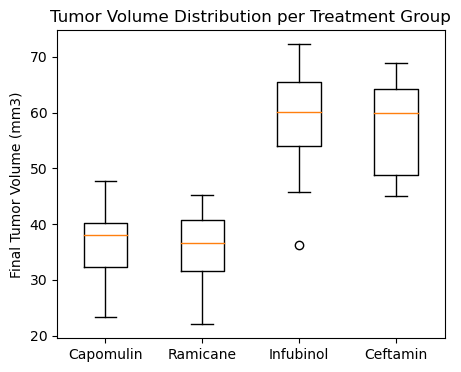

In [16]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
tumor_vol_data = [cap_vol, ram_vol, inf_vol, cef_vol]
plt.figure(figsize=(5,4))
plt.boxplot(tumor_vol_data)
plt.title("Tumor Volume Distribution per Treatment Group")
plt.ylabel("Final Tumor Volume (mm3)")
tick_locations = xticks = [1, 2, 3, 4]
plt.xticks(tick_locations,treatments)
plt.show()


## Line and Scatter Plots

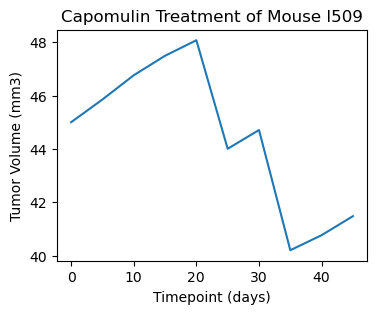

In [17]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin = mouse_df_new[mouse_df_new["Drug Regimen"] =='Capomulin']
capomulin_mouse = capomulin[capomulin["Mouse ID"]=='l509']
volume = capomulin_mouse['Tumor Volume (mm3)']
x_axis = capomulin_mouse['Timepoint']
plt.figure(figsize=(4,3))
plt.plot(x_axis, volume)
plt.title("Capomulin Treatment of Mouse l509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

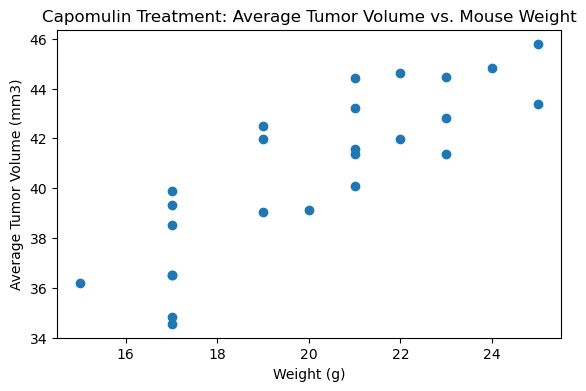

In [18]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_avg = mouse_df_new[mouse_df_new["Drug Regimen"] =='Capomulin']
avg_weight = capomulin_avg.groupby(['Mouse ID']).mean(numeric_only=True)["Tumor Volume (mm3)"]
x_axis_avg = capomulin_avg.groupby(['Mouse ID']).mean(numeric_only=True)["Weight (g)"]
plt.figure(figsize=(6.5,4))
plt.scatter(x_axis_avg, avg_weight)
plt.title("Capomulin Treatment: Average Tumor Volume vs. Mouse Weight")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


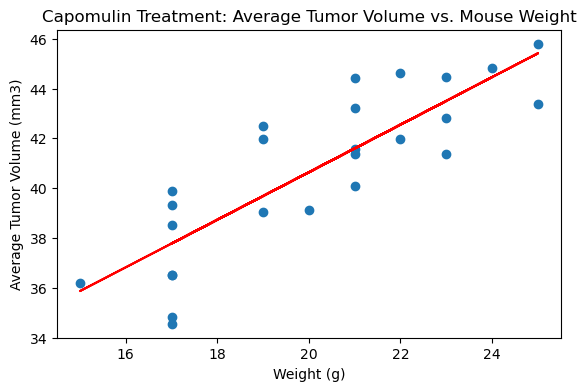

In [19]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
capomulin_avg_reg = mouse_df_new[mouse_df_new["Drug Regimen"] =='Capomulin']
avg_weight_reg = capomulin_avg_reg.groupby(['Mouse ID']).mean(numeric_only=True)["Tumor Volume (mm3)"]
x_axis_avg_reg = capomulin_avg_reg.groupby(['Mouse ID']).mean(numeric_only=True)["Weight (g)"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis_avg_reg, avg_weight_reg)
regress_values = x_axis_avg_reg * slope + intercept
plt.figure(figsize=(6.5,4))
plt.scatter(x_axis_avg_reg, avg_weight_reg)
plt.plot(x_axis_avg_reg, regress_values, "r-")
plt.title("Capomulin Treatment: Average Tumor Volume vs. Mouse Weight")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
print(f"The correlation between mouse weight and the average tumor volume is {rvalue:.2f}")
plt.show()


